In [2]:
5 * 2.5

12.5

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches

In [3]:
style = "<style>svg{width: 50% !important; height: 40% !important;} </style>"
HTML(style)

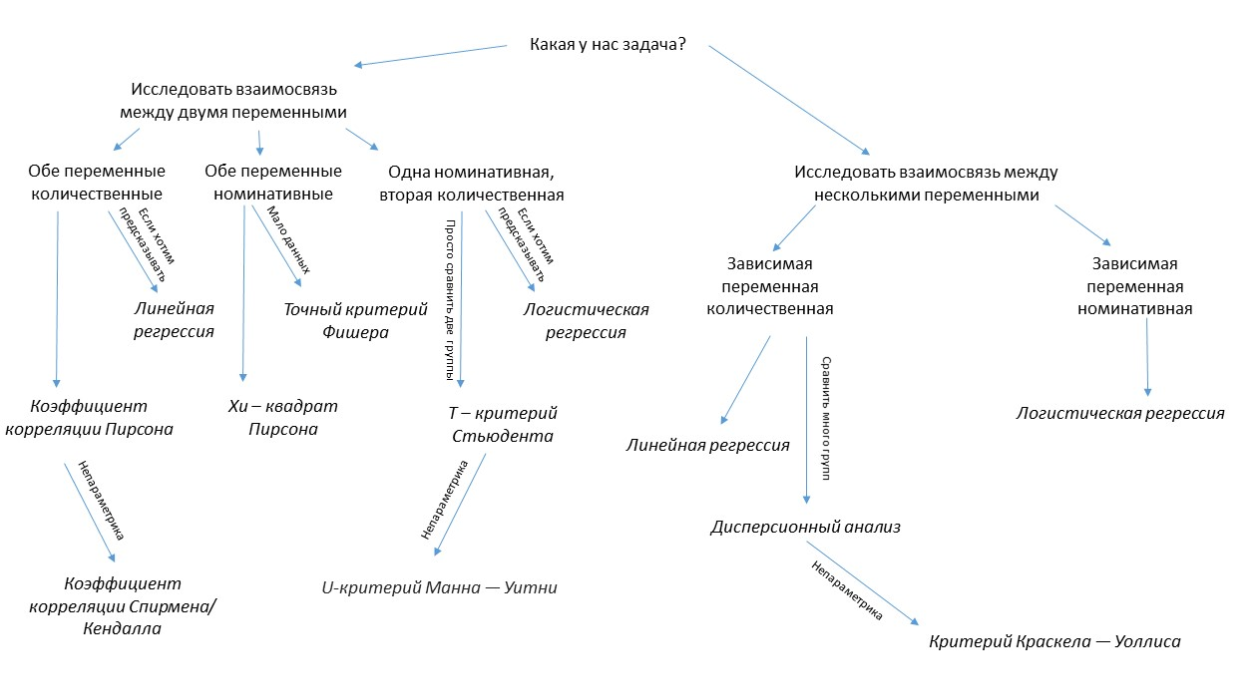

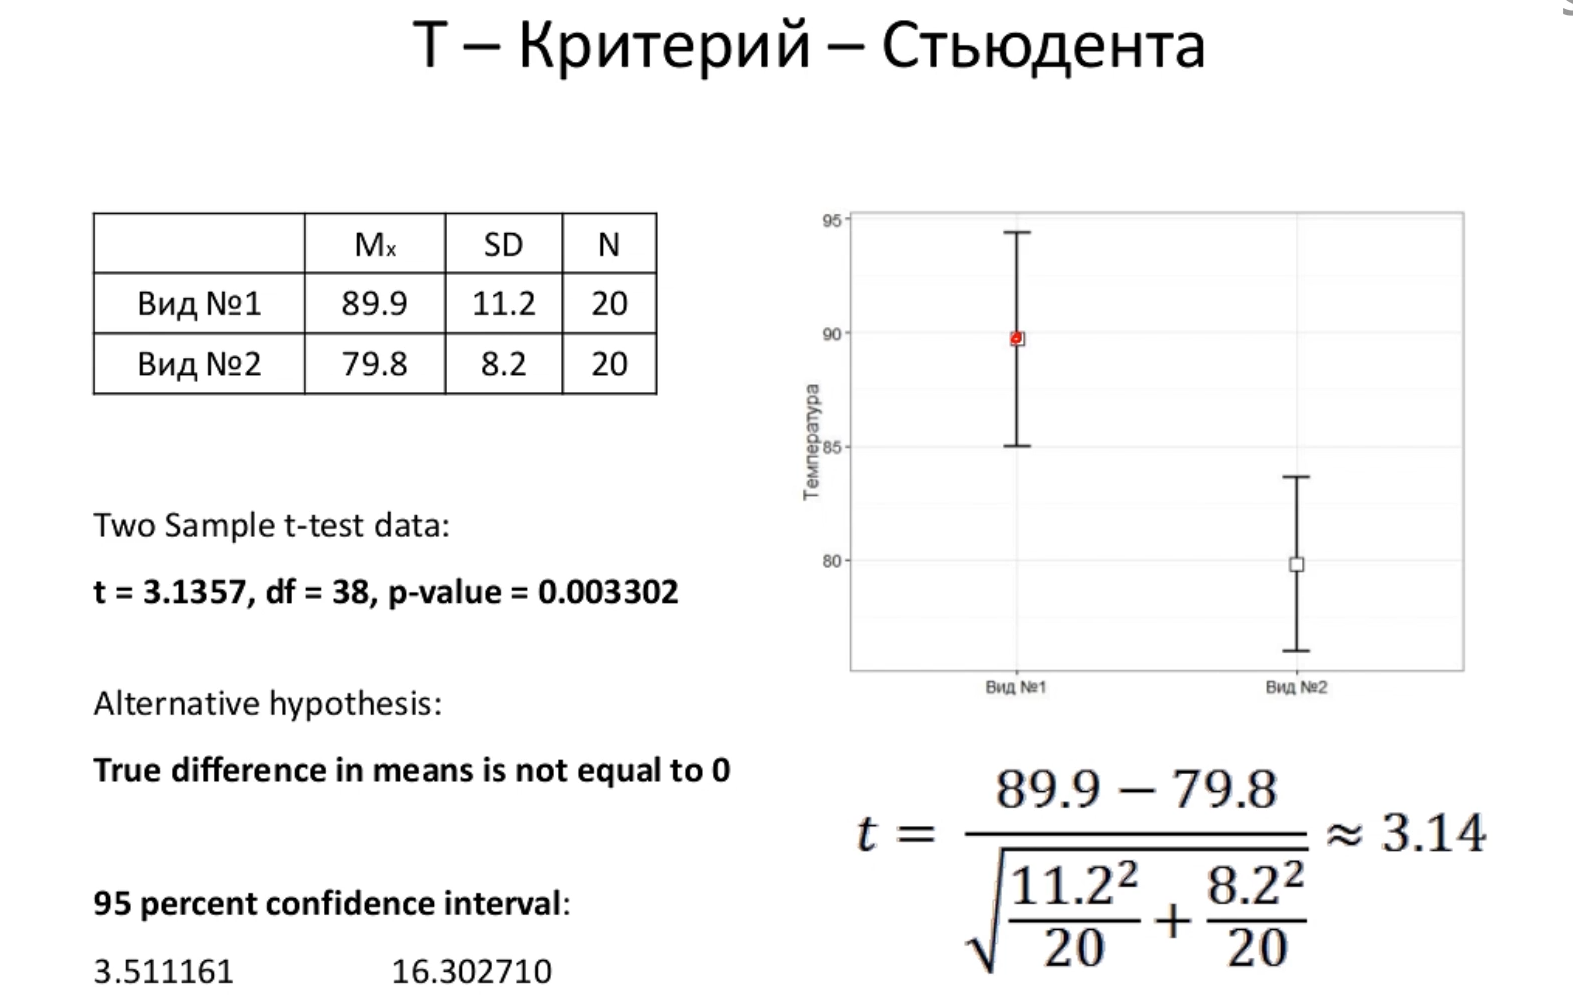

In [4]:
df1 = pd.DataFrame({'Партии': ['Партия А', 'Партия Б', 'Партия В', 'Партия Г'],
                    'Голоса': [40, 30, 20, 90]})

<AxesSubplot:xlabel='Партии', ylabel='Голоса'>

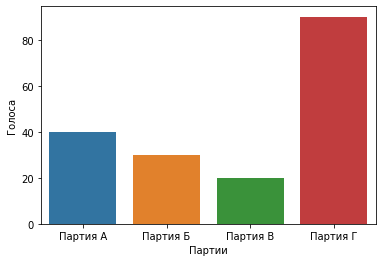

In [5]:
sns.barplot(x=df1.Партии, y=df1.Голоса)

# Анализ таблиц сопряженности

In [6]:
observed_values = [[18, 6], [7, 13]]
chi2, p_value, ddof, expected = chi2_contingency(observed_values)

In [7]:
chi2

5.57719298245614

In [8]:
p_value

0.018195864430772903

In [9]:
ddof

1

In [10]:
expected

array([[13.63636364, 10.36363636],
       [11.36363636,  8.63636364]])

In [11]:
def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

In [12]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)

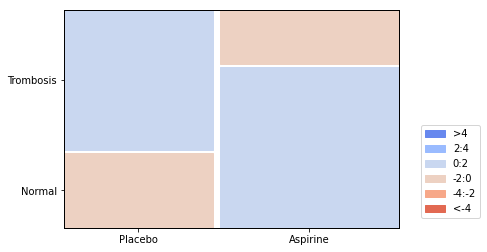

In [13]:
make_me_plot(data)

# Точный критерий Фишера

In [14]:
odds_ratio, p_value = scipy.stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

In [15]:
p_value

0.48571428571428527

In [16]:
odds_ratio

0.1111111111111111

# Логистическая регрессия

In [17]:
data_titanic = pd.read_csv('train.csv')

In [18]:
data_titanic.groupby(['Survived','Pclass', 'Sex']).aggregate({'PassengerId': 'count'})

PassengerId
Survived Pclass Sex                
0        1      female            3
                male             77
         2      female            6
                male             91
         3      female           72
                male            300
1        1      female           91
                male             45
         2      female           70
                male             17
         3      female           72
                male             47

In [19]:
# female first class - intercept
math.log(91/3)

3.41224721784874

In [20]:
# male first class
math.log(45/77) - math.log(91/3)

-3.9493901499321042

In [21]:
# female second class
math.log(70/6) - math.log(91/3)

-0.9555114450274362

In [22]:
# female third class
math.log(72/72) - math.log(91/3)

-3.41224721784874

In [23]:
# male second class
math.log((17/91)/(70/6)) - math.log((45/77)/(91/3))

-0.1849917853498333

In [24]:
# male third class
math.log((47/300)/(72/72)) - math.log((45/77)/(91/3))

2.0957552769859618

In [25]:
X = data_titanic[['Pclass', 'Sex', 'Age']]
X = X.fillna({'Age': X.Age.median()})
y = data_titanic.Survived

In [26]:
X = pd.get_dummies(X)

In [27]:
X['Pclass_1'] = np.where((X.Pclass == 1), 1, 0)
X['Pclass_2'] = np.where((X.Pclass == 2), 1, 0)
X['Pclass_3'] = np.where((X.Pclass == 3), 1, 0)
X = X.drop(['Pclass', 'Sex_male'], axis=1)

In [28]:
X

,Age,Sex_female,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,0,0,1
1,38.0,1,1,0,0
2,26.0,1,0,0,1
3,35.0,1,1,0,0
4,35.0,0,0,0,1
...,...,...,...,...,...
886,27.0,0,0,1,0
887,19.0,1,1,0,0
888,28.0,1,0,0,1
889,26.0,0,1,0,0


In [29]:
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.452035
         Iterations 6


In [30]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 May 2021   Pseudo R-squ.:                  0.3212
Time:                        11:33:47   Log-Likelihood:                -402.76
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.322e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0332      0.007     -4.491      0.000      -0.048      -0.019
Sex_female     2.6115      0.187     13.993      0.000       2.246       2.977
Pclass_1       0.9193      0.327      2.816      0.005       0.279       1.559
Pclass_2      -0.1961      0.286     -0.685      0.494      -0.757       0.365
Pclass_3      -1.4149      0.237     -5.978      0.000      -1.879      -0.951
==============================================================================
"""

In [31]:
log_reg2 = LogisticRegression()

In [32]:
log_reg2.fit(X, y)

LogisticRegression()

In [33]:
log_reg2.coef_

array([[-0.032181  ,  2.51284915,  1.10139512,  0.04032431, -1.1404774 ]])

# Практика по логистической регрессии

Напишите функцию NA_position, которая получает на вход два числовых вектора одинаковой длины. Функция должна возвращать TRUE, если позиции NA в обоих векторах совпадают или пропущенных значений вообще нет, и значение FALSE, если позиции NA в векторах не совпадают.  

In [34]:
def NA_position(v1, v2):
    
    v1_dict = dict()
    v2_dict = dict()
    v_check = dict()
    
    for i in range(len(v1)):
        v1_dict[i] = v1[i]
        v2_dict[i] = v2[i]
    
    for i in v1_dict:
        if v1_dict[i] == 'NA' and v2_dict[i] == 'NA':
            v_check[i] = 1
        elif isinstance(v1_dict[i], int) and isinstance(v2_dict[i], int):
            v_check[i] = 1
        else:
            v_check[i] = 0
    
    if 0 in v_check.values():
        return False
    else:
        return True

In [35]:
v1 = ('NA', 2, 'NA')
v2 = (3, 4, 'NA')
NA_position(v1, v2)

False

Напишите функцию smart_test, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций. Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы,  p-уровня значимости.

In [40]:
df = pd.DataFrame({'x': [int(i) for i in input().split()],
              'y': [int(i) for i in input().split()]})

1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1


In [37]:
def smart_test(df):
    
    chi2_dict = dict()
    for i in df['{}'.format(df.columns[0])].unique():
        for j in df['{}'.format(df.columns[1])].unique():
            chi2_dict[(i, j)] = df[(df['x'] == i) & (df['y'] == j)].shape[0]
    
    a = True
    for i in chi2_dict.values():
        if i < 5:
            a = False
    
    if a == True: #use chi2
        chi2, p_value, ddof, expected = chi2_contingency(
            np.array(
                list(
                    chi2_dict.values()
                )
            ).reshape(df['{}'.format(df.columns[0])].nunique(), df['{}'.format(df.columns[1])].nunique())
        )
        return f"Chi2 - {chi2}, p_value - {p_value}, число степеней свобод - {ddof}"
    elif a == False:
        odds_ratio, p_value = scipy.stats.fisher_exact(
            np.array(
                list(
                    chi2_dict.values()
                )
            ).reshape(df['{}'.format(df.columns[0])].nunique(), df['{}'.format(df.columns[1])].nunique())
        )  # odds_ratio - отношение шансов
        return f"p_value - {p_value}"

In [41]:
smart_test(df)

'Chi2 - 0.058023872679045074, p_value - 0.8096470000779737, число степеней свобод - 1'

# Кластеризация

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Центроид кластера - геометричейский центр точек, центральная точка в i-том кластере - (mean(Xi), mean(Yi))

### Алгоритм:
1) бросаем в рандомное место n центроидов.

2) находим минимальное расстояние от точек до центроидов и кластиризуем.

3) перемещаем центроид в центр i-той области.

4) находим минимальное расстояние от точек до центроидов и кластиризуем.

5) повторяем эти действия до тех пор, пока координаты центроидов меняются.

### Как улучшить алгоритм:
1) улучшить положение центроидов.

2) загнать k-means в range(n-раз).

### Сколько k нужно брать?
Общая сумма квадратов - sum via all k(сумма расстояний от i-той точки до центроида)
Идея, если добавление еще одного клстера в наши данные значительно понижует общую сумму квадратов, это означает, что в увеличении числа кластеров есть смысл.

### Как вариант для определения какое число кластеров мы будем брать, для начала можно использовать иерархическую кластеризацию, а уже после метод k-means

In [45]:
dataset_iris = pd.read_csv('D:\JupyterProjects\datasets\dataset_iris.csv')

In [46]:
dataset_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

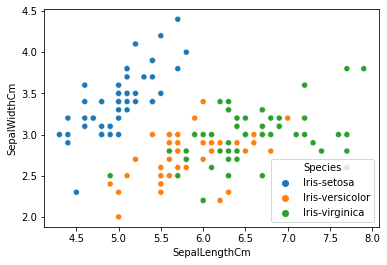

In [60]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=dataset_iris, hue='Species')

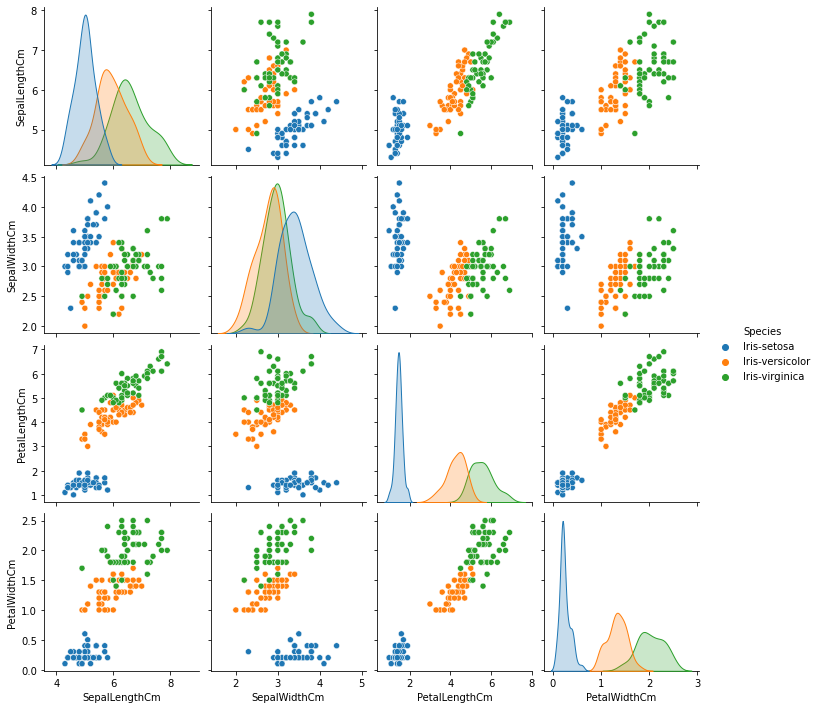

In [55]:
sns.pairplot(dataset_iris.drop('Id', axis=1), hue='Species')

## Функция для поиска внутрикластерной суммы квадратов

In [83]:
point_dict = dict()
i = 1
while True:
    input_data = input().split()
    if 'Создать' in input_data:
        break
    else:
        coord_X, coord_Y = input_data[0], input_data[1]
        point_dict[i] = (int(coord_X), int(coord_Y))
        i += 1

7 2
1 4
2 2
8 4
9 1
10 24
2 5
9 9
24 3
5 5
5 7
8 3
Создать


In [81]:
def incluster_sum_of_squares(point_dict):
    # find coord_centroid
    X_sum = 0
    Y_sum = 0
    for i in point_dict.values():
        X_sum += i[0]
        Y_sum += i[1]
    coord_centroid = (X_sum / len(list(point_dict.values())), Y_sum / len(list(point_dict.values())))
    # find incluster_sum_of_squares
    vectors_dict = dict()
    incluster_sum_square = 0
    for i in point_dict:
        vectors_dict[i] = (coord_centroid[0] - point_dict[i][0]) ** 2 + (coord_centroid[1] - point_dict[i][1]) ** 2
    incluster_sum_square = sum(list(vectors_dict.values()))
    return incluster_sum_square

In [84]:
incluster_sum_of_squares(point_dict)

817.25

# Анализ главных компонентов (principal component analysis)

Анализ главных компонентов очень удобная штука. Например, когда у нас линейная регрессия из множества компонентов, которые коррелируют между собой, то мы можем объединить данные переменные в одну, что значительно облегчит нашу работу